## Quick exercise
A simple data import and plotting exercise, done to help my mom (an elementary school aide) teach boxplots and histograms.

In [1]:
import pandas as pd

In [4]:
# table from: http://www.baseball-reference.com/teams/NYY/2013.shtml
yankees = pd.read_clipboard(header = None)
yankees.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Alex Rodriguez,37,44,181,3,0,0,-3,-1,-2,...,5,0.5,0.496,0.499,0.8,-0.4,8,"$28,000,000",Free Agency,5D
1,CC Sabathia*,32,32,4,-1,0,0,0,1,0,...,0,-0.0,0.499,0.500,-0.0,0.1,0,"$23,000,000",Free Agency,1
2,Mark Teixeira#,33,15,63,-3,0,0,0,-1,-4,...,-2,-0.2,0.468,0.497,-0.2,-0.1,-2,"$22,500,000",Free Agency,3/D
3,Vernon Wells,34,130,458,-13,0,0,0,-6,-20,...,-3,-0.4,0.484,0.487,-0.5,-0.5,-3,"$21,000,000",Traded,79D/345
4,Alfonso Soriano,37,58,243,7,0,0,1,-3,5,...,14,1.5,0.509,0.503,1.3,-0.1,13,"$18,000,000",Traded,7/D


In [8]:
# 0,19 reads as indices but those are the column names
nyy = yankees[[0,19]]
nyy.head()

,0,19
0,Alex Rodriguez,"$28,000,000"
1,CC Sabathia*,"$23,000,000"
2,Mark Teixeira#,"$22,500,000"
3,Vernon Wells,"$21,000,000"
4,Alfonso Soriano,"$18,000,000"


In [9]:
nyy.columns = ['name', 'salary']
nyy.head()

,name,salary
0,Alex Rodriguez,"$28,000,000"
1,CC Sabathia*,"$23,000,000"
2,Mark Teixeira#,"$22,500,000"
3,Vernon Wells,"$21,000,000"
4,Alfonso Soriano,"$18,000,000"


In [12]:
nyy['salary'] = nyy.salary.str.replace('$','').str.replace(',','')
nyy.head()

-c:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


,name,salary
0,Alex Rodriguez,28000000
1,CC Sabathia*,23000000
2,Mark Teixeira#,22500000
3,Vernon Wells,21000000
4,Alfonso Soriano,18000000


In [15]:
# pandas needs to recognize 'salary' as an integer for plotting
nyy['salary'] = nyy.salary.astype(int)
nyy

,name,salary
0,Alex Rodriguez,28000000
1,CC Sabathia*,23000000
2,Mark Teixeira#,22500000
3,Vernon Wells,21000000
4,Alfonso Soriano,18000000
5,Derek Jeter,17000000
6,Robinson Cano*,15000000
7,Curtis Granderson*,15000000
8,Hiroki Kuroda,15000000
9,Andy Pettitte*,12000000


In [16]:
nyy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
name      31 non-null object
salary    31 non-null int32
dtypes: int32(1), object(1)

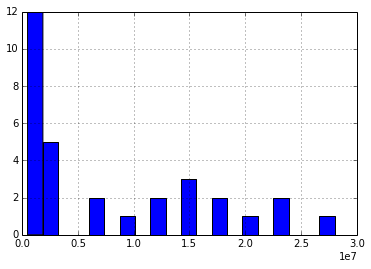

In [18]:
nyy.salary.hist(bins = 20)

In [19]:
nyy.salary.median()

3100000.0

In [20]:
nyy.salary.mean()

7885891.935483871

C:\Python27\lib\site-packages\pandas\tools\plotting.py:2380: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0xe2b1518>],
 'caps': [<matplotlib.lines.Line2D at 0xd9644a8>,
 'fliers': [<matplotlib.lines.Line2D at 0xd9e2048>,
 'medians': [<matplotlib.lines.Line2D at 0xe2b1a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb16fcc0>,
  <matplotlib.lines.Line2D at 0xd964208>]}

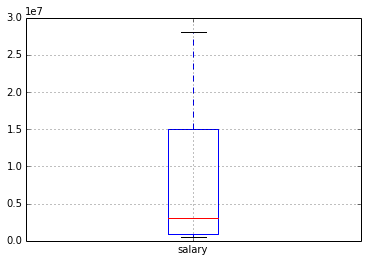

In [23]:
nyy.boxplot(column = 'salary')

In [24]:
# need only the five-number summary to draw boxplots by hand
nyy.salary.describe()

count          31.000000
mean      7885891.935484
std       8456957.882910
min        490525.000000
25%        917500.000000
50%       3100000.000000
75%      15000000.000000
max      28000000.000000
dtype: float64